# ***EDA of anz transaction data***

***importing packages***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ANZ synthesised transaction dataset.csv')
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


***identifying variables***

categorical:

    1.status
    2.card_present_flag
    3.currency
    4.txn_description
    5.gender
    6.merchant_suburb
    7.merchant_state
    8.country
    9.movement
continuous:

    1.balance
    2.date
    3.age
    4.amount
discrete:

    1.bpay_biller_code
    2.account
    3.long_lat
    4.merchant_id
    5.merhant_code
    6.extraction
    7.transaction_id
    8.customer_id
    9.merchant_long_lat

In [3]:
df.shape

(12043, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             12043 non-null  object 
 1   card_present_flag  7717 non-null   float64
 2   bpay_biller_code   885 non-null    object 
 3   account            12043 non-null  object 
 4   currency           12043 non-null  object 
 5   long_lat           12043 non-null  object 
 6   txn_description    12043 non-null  object 
 7   merchant_id        7717 non-null   object 
 8   merchant_code      883 non-null    float64
 9   first_name         12043 non-null  object 
 10  balance            12043 non-null  float64
 11  date               12043 non-null  object 
 12  gender             12043 non-null  object 
 13  age                12043 non-null  int64  
 14  merchant_suburb    7717 non-null   object 
 15  merchant_state     7717 non-null   object 
 16  extraction         120

In [5]:
df.isna().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [6]:
df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


formatting date according to month and days in name format

In [7]:
df['date'] = pd.to_datetime(df['date'])
df['day_name'] = df['date'].dt.day_name()
df['month_name'] = df['date'].dt.month_name()
df['month_name'].value_counts()

October      4087
September    4013
August       3943
Name: month_name, dtype: int64

# ***Univariate analysis***

M    6285
F    5758
Name: gender, dtype: int64


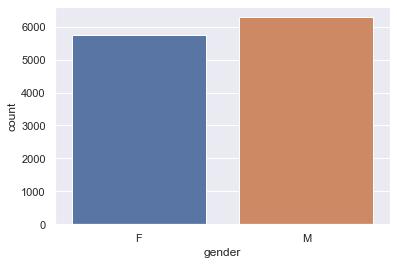

In [29]:
print(df['gender'].value_counts())
sns.set(style="darkgrid")
sns.countplot(df['gender'])
plt.show()

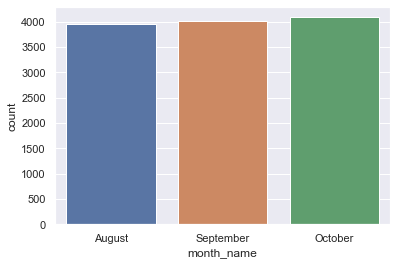

In [9]:
sns.countplot(x='month_name' , data=df)

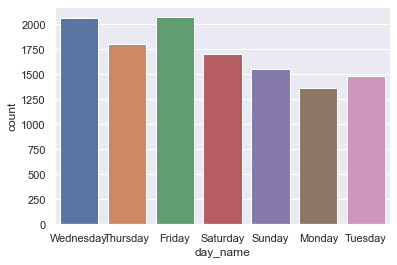

In [30]:
sns.countplot(x='day_name' , data=df)

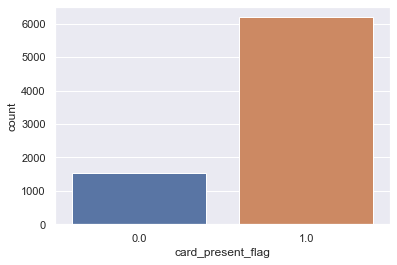

In [31]:
ax = sns.countplot(x='card_present_flag' , data=df)
plt.show()

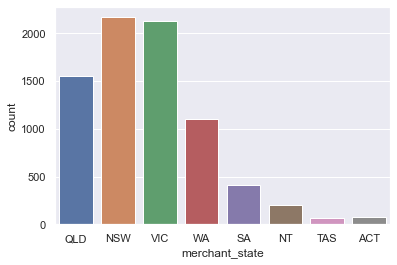

In [32]:
sns.countplot(df['merchant_state'])
plt.show()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64


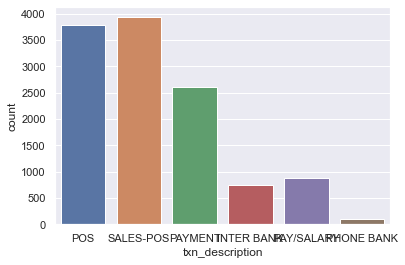

In [33]:
print(df['txn_description'].value_counts())
sns.set(style="darkgrid")
ax = sns.countplot(df['txn_description'])

In [14]:
top_5_customers = df['first_name'].value_counts(sort=True).nlargest(5)
top_5_customers

Michael    746
Diana      578
Jessica    408
Joseph     391
Jeffrey    388
Name: first_name, dtype: int64

debit     11160
credit      883
Name: movement, dtype: int64


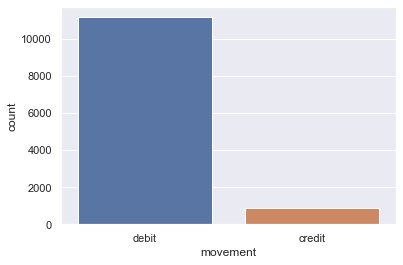

In [34]:
print(df['movement'].value_counts())
sns.countplot(df['movement'])

***insights drawn***

1.males make more transactions than females on total count.

2.transactions made in all three months are almost equal but slightly high in october and on wednesday and friday.

3.new south whales and victoria states have more merchants located and less in australian capital territory.

4.more POS and SALES-POS are more statements in transaction description.

5.majority use debit card than credit card for payment.

6.Michael, Diana, Jessica, Joseph, Jeffrey are the top 5 customers.

# ***Multivariate analysis***

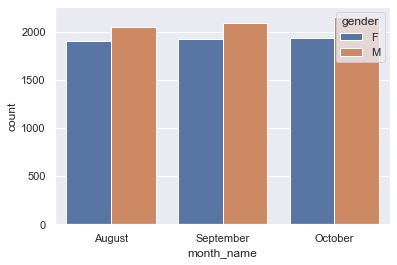

In [35]:
sns.countplot(x='month_name' ,hue='gender', data=df)

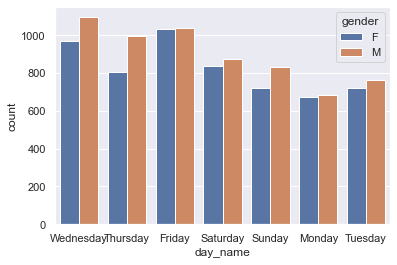

In [36]:
ax = sns.countplot(x="day_name", hue="gender", data=df)

[Text(0, 0.5, 'genderwise states'), Text(0.5, 0, 'count')]

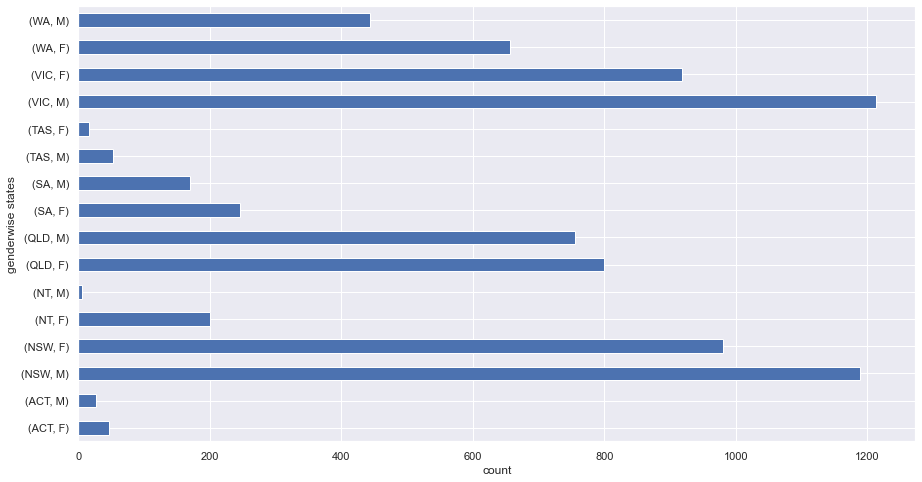

In [44]:
merchantstate = df.groupby(['merchant_state'])
fig,ax = plt.subplots(figsize=(15,8))
gendermer = merchantstate['gender'].value_counts()
gendermer.plot.barh()
ax.set(xlabel="count", ylabel="genderwise states")

In [19]:
agg_amt_state = merchantstate['amount'].agg(['count','min','max','mean','median'])
agg_amt_state

,count,min,max,mean,median
merchant_state,,,,,
ACT,73,4.50,1348.47,66.803836,22.910
NSW,2169,0.10,4233.00,47.036316,22.530
NT,205,1.71,1285.09,44.726293,17.810
QLD,1556,0.10,7081.09,34.372397,14.700
SA,415,3.28,909.61,40.425470,22.120
TAS,68,7.35,133.31,28.866618,22.080
VIC,2131,0.10,3680.71,41.099953,21.730
WA,1100,2.05,1692.56,30.901873,18.365


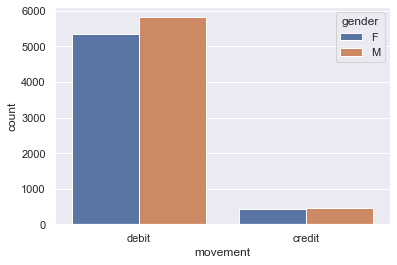

In [37]:
ax = sns.countplot(df['movement'] , hue=df['gender'])

***insights drawn***


1.in all three months and in all days males make more transactions than females

2.males use both credit and debit cards more than females

3.females make more transactions in WA, SA, QLD, NT, ACT than males.

# ***Correlation matrix***

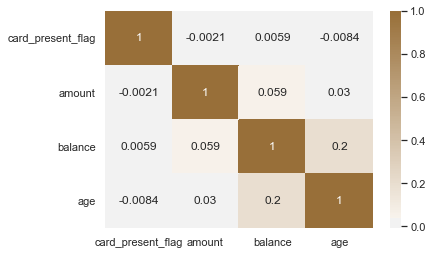

In [21]:
cor_mat = df[['card_present_flag' , 'amount' , 'balance' ,'date' , 'status', 
             'bpay_biller_code' , 'account' , 'txn_description',
             'gender' , 'age' , 'extraction']].corr()
# Custom cmap pallete
cmap = sns.diverging_palette(100 , 50 , as_cmap=True)

# Building heatmap
sns.heatmap(cor_mat, annot=True, center=0 , cmap=cmap)

# ***Continuous variable plots***

Text(0.5, 1.0, 'Distribution of customers based on age group')

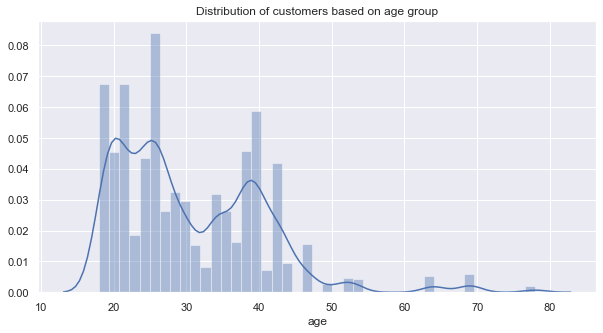

In [40]:
plt.figure(figsize=(10,5))
sns.distplot(df['age']);
plt.title('Distribution of customers based on age group')

Text(0.5, 1.0, 'Distribution of customers based on amount spent')

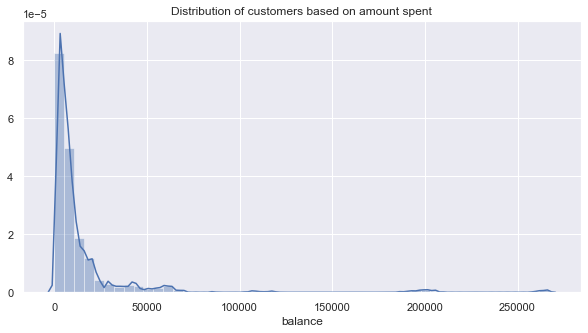

In [41]:
plt.figure(figsize=(10,5))
sns.distplot(df['balance']);
plt.title('Distribution of customers based on amount spent')

both age and amount distribution plots are right skewed

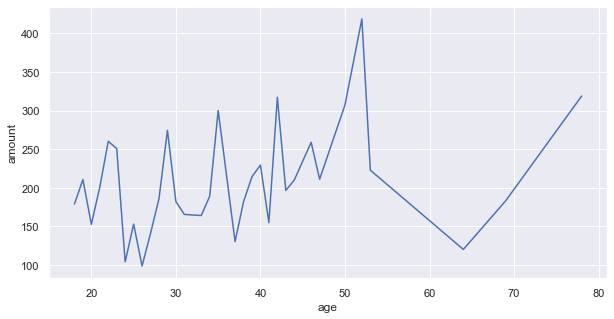

In [42]:
plt.figure(figsize=(10,5))
sns.lineplot(x='age' , y='amount' ,ci=None, data=df)

people ageed arround 50-55 years spend more amount 

***probability plots :***

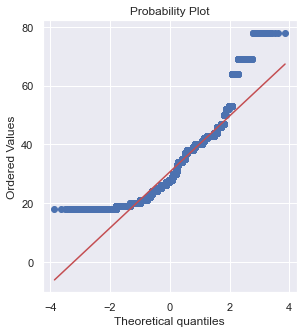

In [25]:
import scipy.stats as stat          #scipy has a stat lib. to display probplot                                
plt.figure(figsize=(10,5))          #to check whether the feature is normally distributed ot not
df["age"].hist()
plt.subplot(1,2,2)
stat.probplot(df["age"],dist='norm',plot=plt)
plt.show()

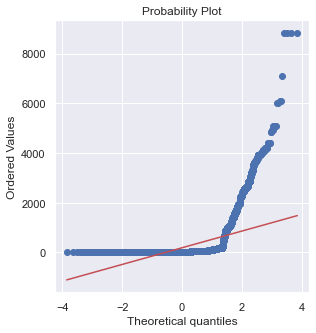

In [26]:
plt.figure(figsize=(10,5))   
df["amount"].hist()
plt.subplot(1,2,2)
stat.probplot(df["amount"],dist='norm',plot=plt)
plt.show()

# *Time series forecasting*

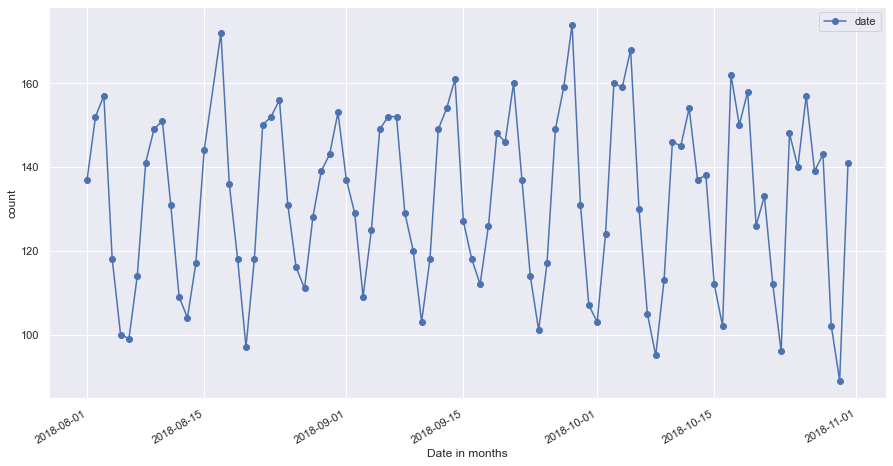

In [45]:
df['date'].value_counts(sort=True).plot(kind='line',marker='o',figsize=(15, 8))
plt.xlabel('Date in months')
plt.ylabel('count')
plt.legend()
plt.grid(True)
plt.show()

from the above tiem series we can observe that peak frequency of sales in October and least in November

# *END*